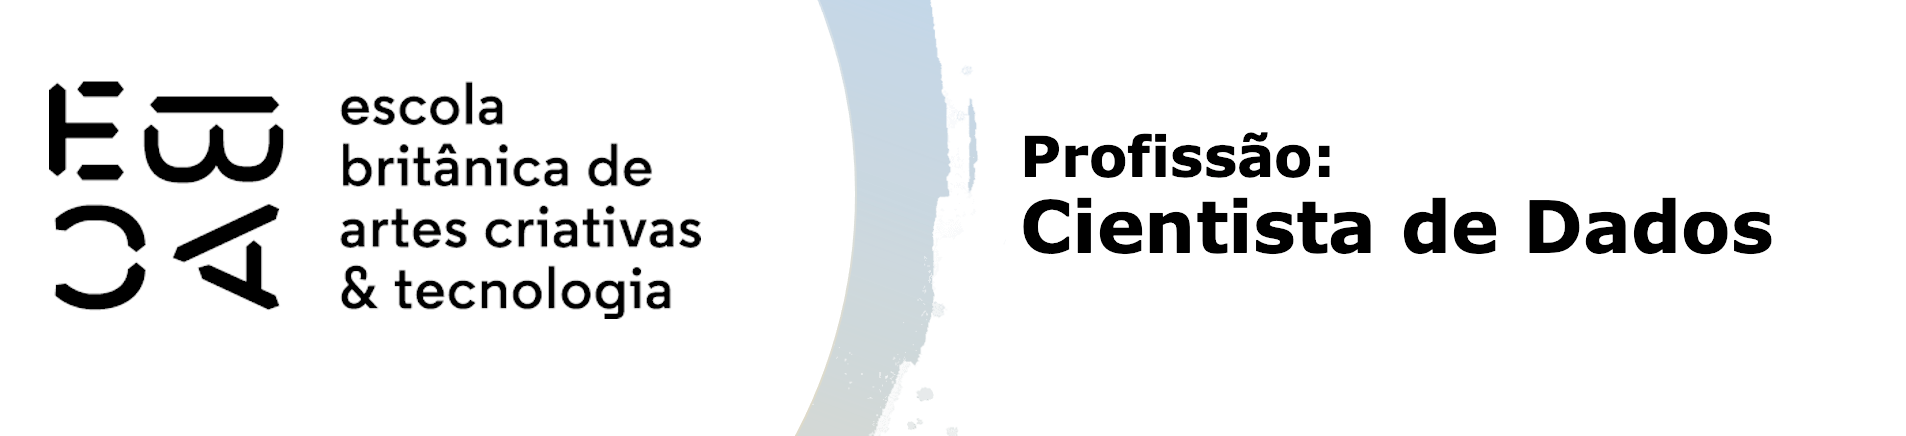

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
peng = sns.load_dataset('penguins') #carregando a base de dados de pinguins
peng.index.name='id' #adicionando id ao nome do index
peng_num = peng.select_dtypes(include='number').dropna() #selecionando somente as variáveis numéricas e dropando os missings

In [3]:
peng_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0


In [111]:
peng_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   grupo              342 non-null    int64  
 5   species            342 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 18.7+ KB


C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\A

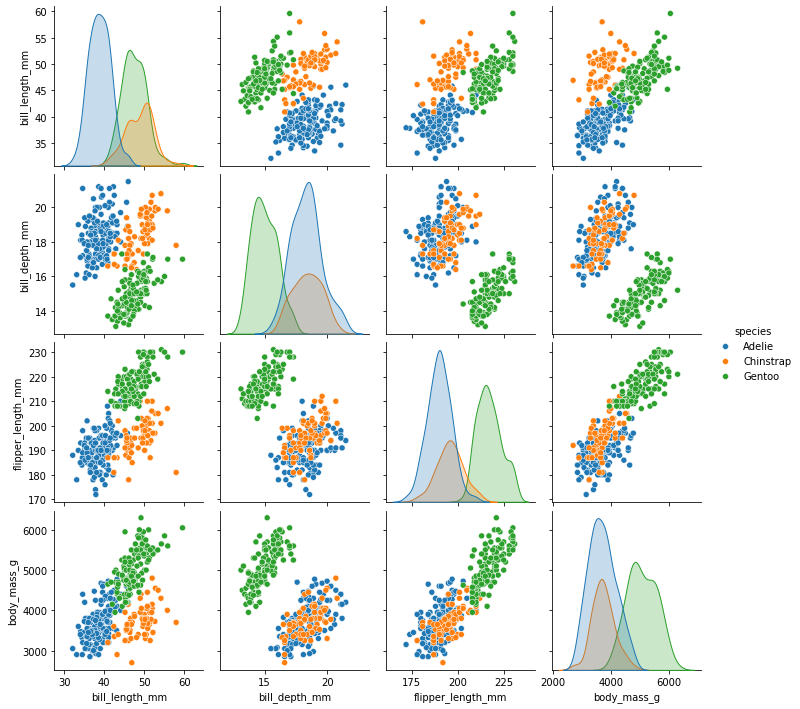

In [4]:
sns.pairplot(data=peng, hue='species')

In [5]:
# padronizando os dados com média 0 e std 1 usando a base com somente variáveis numéricas
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [6]:
# criando objeto que constroi 3 agrupamentos e o fitando na base de pinguins padronizada

clus = AgglomerativeClustering(linkage="complete", #método da menor distancia entre pontos
                                 distance_threshold = None, 
                                 n_clusters=3) #número de clusters
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [7]:
#adicionando as classificação na base de var numéricas
peng_num['grupo'] = clus.labels_

In [8]:
#junto os dados da var grupo da base numérica a base original pela var id
peng = peng.merge(peng_num['grupo'], how='left', on='id')

C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\A

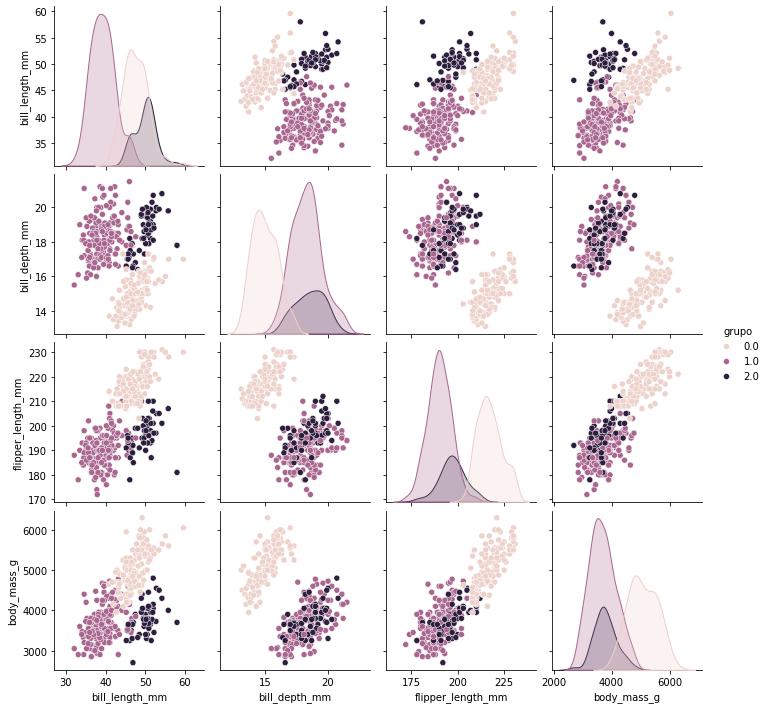

In [9]:
sns.pairplot(data=peng, hue='grupo')

In [124]:
#como a df com somente as var numéricas sofreu uma alteração ao adicionar a coluna de classificação
#optei por criar uma nova df para plotar o dendrograma
df = peng.select_dtypes('number').dropna()
df = df.drop(columns = 'grupo')
df_pad = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)
df_pad

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175
338,0.527932,-1.445897,1.003109,0.809516
339,1.188289,-0.735923,1.501644,1.933419
340,0.234440,-1.192335,0.789451,1.246590


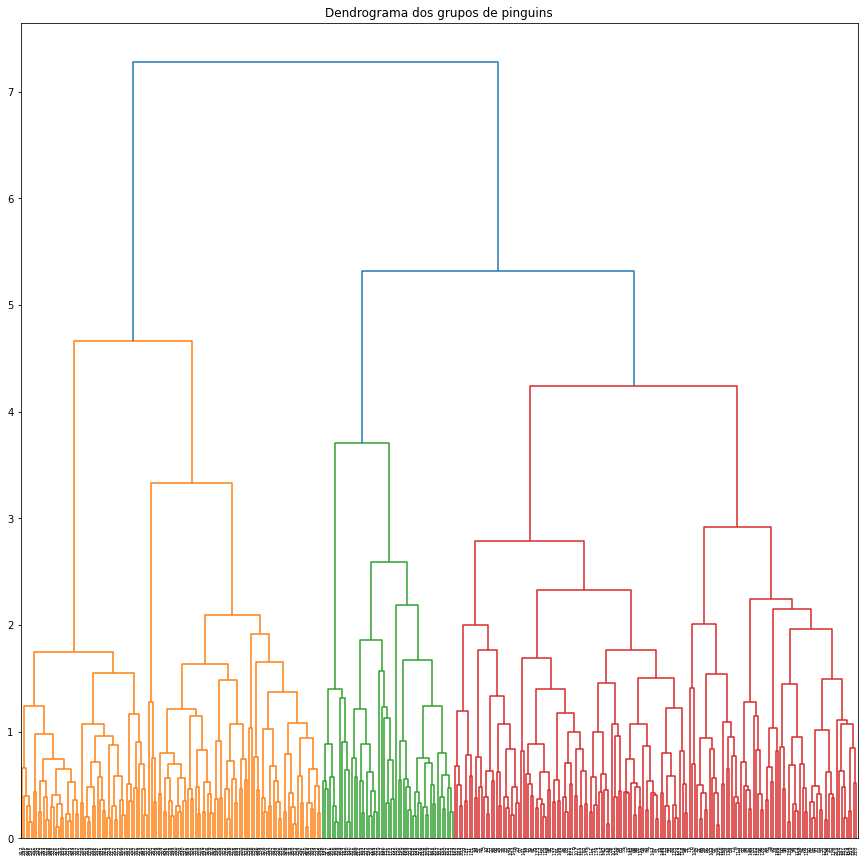

In [125]:
#plotando dendrograma
plt.figure(figsize=(15, 15))

plt.title("Dendrograma dos grupos de pinguins")

dend = shc.dendrogram(shc.linkage(df_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [11]:
#adicionar a va species apra cruzar os dados
peng_num['species'] = peng['species']

In [126]:
pd.crosstab(peng_num['grupo'], peng_num['species'])

species,Adelie,Chinstrap,Gentoo
grupo,,,
0,0,0,123
1,151,14,0
2,0,54,0


In [13]:
peng_num.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'grupo', 'species'],
      dtype='object')

In [14]:
#criando obj com as var de interesse
variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [130]:
#adicionando o agrupamento a df padronizada
df_pad['grupo'] = clus.labels_

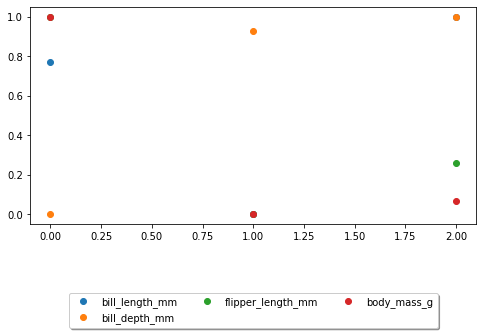

In [131]:
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df_pad.groupby(['grupo'])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)

In [210]:
#criando uma data frame para cada contagem de vezes que uma variável aparece para um grupo
bl = pd.DataFrame(df_pad.groupby(['bill_length_mm', 'grupo'])['grupo'].count().unstack().count())
bd = pd.DataFrame(df_pad.groupby(['bill_depth_mm', 'grupo'])['grupo'].count().unstack().count())
fl = pd.DataFrame(df_pad.groupby(['flipper_length_mm', 'grupo'])['grupo'].count().unstack().count())
bm = pd.DataFrame(df_pad.groupby(['body_mass_g', 'grupo'])['grupo'].count().unstack().count())

In [264]:
#juntando todos os df em um só df
var_qtd = pd.concat([bl,bd,fl,bm], axis=  1, names = [bl,bd,fl,bm], join = 'outer')
var_qtd.columns = ['bl','bd','fl','bm']
var_qtd
# a tabela abaixo contem a quantidade de cada presença de variável por grupo

,bl,bd,fl,bm
grupo,,,,
0,75,39,25,47
1,85,49,32,57
2,44,30,24,29


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


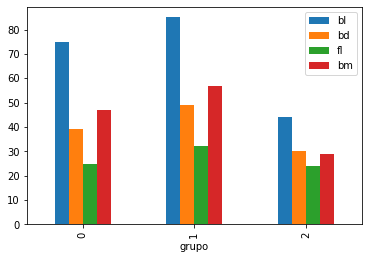

In [267]:
var_qtd.plot.bar()

ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Variáveis por grupo')
ax.set_xlabel('variavel e grupo')
ax.set_ylabel('quantidade')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

> **Há alguma coutra forma mais rápida de fazer essa apresentação de quantas variáveis por grupo?**

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\A

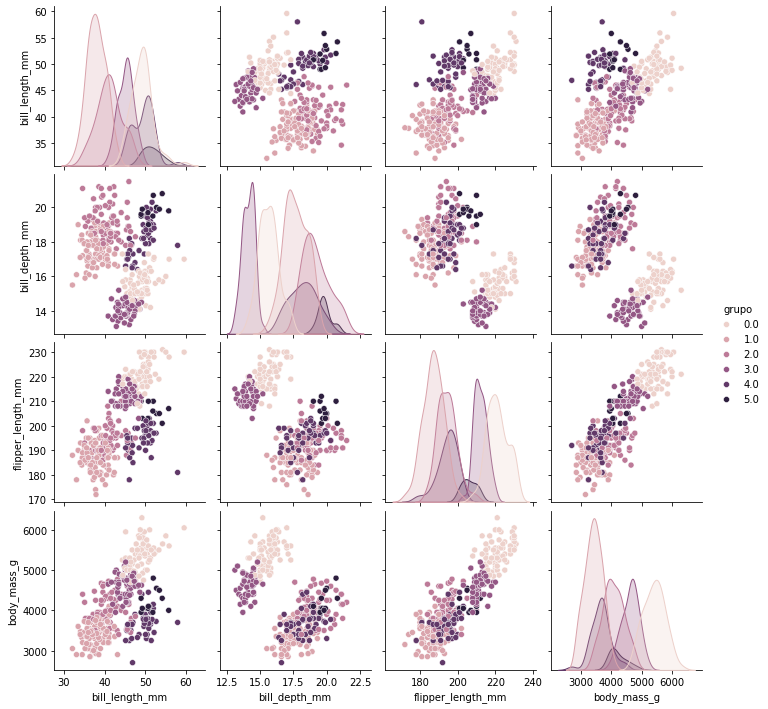

In [282]:
# juntei todas as linhas de código pra resumir numa célula só

# carregando a base novamente,como até mesmo a base 
peng = sns.load_dataset('penguins') #carregando a base de dados de pinguins
peng.index.name='id' #adicionando id ao nome do index
peng_num = peng.select_dtypes(include='number').dropna() #selecionando somente as variáveis numéricas e dropando os missings

# padronizando os dados com média 0 e std 1 usando a base com somente variáveis numéricas
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

# criando objeto que constroi 6 agrupamentos e o fitando na base de pinguins padronizada

clus = AgglomerativeClustering(linkage="complete", #método da menor distancia entre pontos
                                 distance_threshold = None, 
                                 n_clusters=6) #número de clusters
clus.fit(peng_pad)

#adicionando as classificação na base de var numéricas
peng_num['grupo'] = clus.labels_

#junto os dados da var grupo da base numérica a base original pela var id
peng = peng.merge(peng_num['grupo'], how='left', on='id')

sns.pairplot(data=peng, hue='grupo')

In [283]:
# pinguins por espécie
pd.crosstab(peng['grupo'], peng['species'])

species,Adelie,Chinstrap,Gentoo
grupo,,,
0.0,0,0,71
1.0,91,5,0
2.0,60,9,0
3.0,0,0,52
4.0,0,42,0
5.0,0,12,0


In [276]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   grupo              342 non-null    float64
dtypes: float64(5), object(3)
memory usage: 24.2+ KB


In [288]:
# pinguins de cada espécie machos e fêmeas há em cada grupo
peng.groupby(['species', 'sex', 'grupo'])['grupo'].count().unstack(2) # alterando o unstack com o número da var é possível analisar de uma outra perspectiva o agrupamento

grupo              0.0   1.0   2.0   3.0   4.0   5.0
species   sex                                       
Adelie    Female   NaN  69.0   4.0   NaN   NaN   NaN
          Male     NaN  18.0  55.0   NaN   NaN   NaN
Chinstrap Female   NaN   5.0   9.0   NaN  20.0   NaN
          Male     NaN   NaN   NaN   NaN  22.0  12.0
Gentoo    Female   9.0   NaN   NaN  49.0   NaN   NaN
          Male    61.0   NaN   NaN   NaN   NaN   NaN

#### Conclusões

> Originalmente, a espécie Gentoo parece ser a que mais se diferenciava das demais. no entanto, quanto mais a quantidade de agrupamentos,ela acabava por se subdividir  em no max 2 grupos.

> A frequencia acima é observada também nas demais espécies. as espécies se dividiram em no máximo dois grupos.

> Já quando analisadado o sexo. Adelie e Gentoo, parecem se dividir entre até